This notebook generates a dictionary containing a list of N similar/dissimilar movies for every single movie. It is further used during neural network training.

In [1]:
# choose number of similar/dissimilar movies selected for each one
n = 50

In [2]:
from time import time
from pickle import dump

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import boxcox

In [3]:
df = pd.read_csv('./dataset.csv', index_col=0)
df.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,Music,Romance,Documentary,Musical,Mystery,Horror,History,Animation,Film-Noir,Sport
Avatar,1.0,0.889163,0.529412,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pirates of the Caribbean: At World's End,1.0,0.370690,0.501548,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spectre,1.0,0.740148,0.436533,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Dark Knight Rises,1.0,1.000000,0.486068,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
John Carter,1.0,0.567734,0.386997,0.020652,0.023043,0.001000,0.096066,0.125579,0.002852,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# df.columns

In [5]:
# compute pairwise cosine similarity
cos = cosine_similarity(df.values)

# conmstruct new DataFrame with cosine similarity
df_sim = pd.DataFrame(cos, columns=df.index.values, index=df.index.values)
df_sim.head()

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On the Downlow,Sanctuary; Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,The Mongol King,Newlyweds,Signed Sealed Delivered,My Date with Drew
Avatar,1.000000,0.899638,0.762408,0.662182,0.867192,0.774881,0.543105,0.878110,0.702090,0.905711,...,0.473374,0.330356,0.396338,0.530590,0.456022,0.429652,0.427458,0.401939,0.414857,0.462718
Pirates of the Caribbean: At World's End,0.899638,1.000000,0.819060,0.639308,0.815381,0.829370,0.604121,0.789029,0.765213,0.805211,...,0.546809,0.397790,0.467795,0.440636,0.539324,0.509079,0.491752,0.478076,0.489446,0.544352
Spectre,0.762408,0.819060,1.000000,0.782699,0.829579,0.819910,0.484124,0.800191,0.610753,0.833469,...,0.549784,0.553121,0.459630,0.617116,0.756507,0.650231,0.491798,0.473375,0.481627,0.540555
The Dark Knight Rises,0.662182,0.639308,0.782699,1.000000,0.618988,0.659054,0.352269,0.749259,0.513312,0.697447,...,0.485754,0.474542,0.405846,0.548813,0.652406,0.562530,0.440506,0.414094,0.427851,0.476410
John Carter,0.867192,0.815381,0.829579,0.618988,1.000000,0.812528,0.479269,0.926505,0.600861,0.955313,...,0.553921,0.400695,0.466330,0.625028,0.544273,0.512394,0.495333,0.481060,0.488836,0.548049


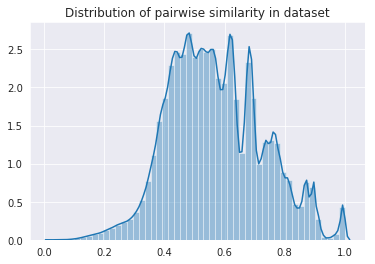

In [9]:
# plot similarity distribution
sns.set_style('darkgrid')
sns.distplot(df_sim.values.flatten())
plt.title('Distribution of pairwise similarity in dataset')
plt.savefig('dataset_dist.png')



In [10]:
vals = df_sim.values.flatten()
from scipy.stats import skew
print(skew(vals))

0.269974786093941


In [8]:
start = time()
movie_sims = dict()
for movie_name in df_sim.columns.values:
    movie_sims[movie_name] = dict()
    
    # choose most/least similar movies
    top_n = df_sim[movie_name].nlargest(n+1)
    low_n = df_sim[movie_name].nsmallest(n)
    
    # add them to our data along with similarity score
    movie_sims[movie_name]['pos'] = {k:v for k, v in zip(top_n.index.values[1:],
                                                         top_n.values[1:])}
    movie_sims[movie_name]['neg'] = {k:v for k, v in zip(low_n.index.values[1:],
                                                         low_n.values[1:])}

print(f'It took {time() - start} seconds.')

It took 5.790462017059326 seconds.


In [9]:
# serialize results
with open('./sims.pkl', 'wb') as f:
    dump(movie_sims, f)

In [10]:
# example of similar movies
df_sim['Spectre'].nlargest(10)

Spectre                                 1.000000
Mission: Impossible - Rogue Nation      0.994696
Skyfall                                 0.993411
The Bourne Legacy                       0.993227
Mission: Impossible - Ghost Protocol    0.992643
Live Free or Die Hard                   0.986621
Mission: Impossible II                  0.976917
xXx                                     0.973611
The World Is Not Enough                 0.973355
Tomorrow Never Dies                     0.967141
Name: Spectre, dtype: float64